<div align=center>

<p></p>
<p></p>
<font size=5>
In the Name of God
<font/>
<p></p>
 <br/>
    <br/>
<font color=#4d7db8>
Sharif University of Technology - Department of Electrical Engineering
</font>
<p></p>
<font color=#4d7db8>
Introduction To Machine Learning - Dr. Sajjad Amini
</font>
<br/>
<br/>
Spring Semester 1401-02

<div/>

<hr/>
		<div align=center>
		    <font color=red size=6>
			    <br />
Project - 3rd Phase
<br />
Image Denoising using Autoencoder and PCA
			</font>
    <br/>
<font size=4>
			<br/><br/>
Due on Tir 10th
                <br/><b>
              Cheating is Strongly Prohibited
                </b><br/><br/>
                <font color=green>
Should you have any questions concerning the project, please feel free to ask via Telegram.
     </font>
</font>
                <br/>
    </div>

# Personal Info
<hr/>
    <div class="column" align=center>
    <font size=4>
        <div class="column">
        <br />
            student_number = 98102002
            <br />
            Name = Shaghayegh    
            <br />
            Last_Name = Ataei
        </div>
        <div class="column">
        <br />
            student_number = 99101076
            <br />
            Name = Naghmeh   
            <br />
            Last_Name = Adibi
        </div>
    </font>
    </div>


1. Download the MNIST dataset and create a dataloader that adds gaussian noise to the input images.
2. Design and train an AutoEncoder on the MNIST dataset to denoise the noisy images.
3. Visualize original images, their corresponding noisy images and their reconstructed versions side by side.
4. Repeat the previous steps using PCA algorithm.

# Import Necessary Libraries

In [1]:
import torch
import numpy as np
from torchvision import datasets
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load Dataset and Prepare It

In [2]:
train_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root='~/.pytorch/MNIST_data/', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 85269167.53it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 120055197.05it/s]

Extracting /root/.pytorch/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw




100%|██████████| 1648877/1648877 [00:00<00:00, 22623131.82it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 26983751.80it/s]


Extracting /root/.pytorch/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.pytorch/MNIST_data/MNIST/raw



In [3]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=20, num_workers=0)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=20, num_workers=0)



# Define Your Model
torch neural network model

In [4]:
class AoutoEncoder(nn.Module):
    def __init__(self):
      super(AoutoEncoder, self).__init__()
      #Encoder:
      self.conv1 = nn.Conv2d(1, 32, 3, padding=1)
      self.conv2 = nn.Conv2d(32, 16, 3, padding=1)
      self.conv3 = nn.Conv2d(16, 8, 3, padding=1)
      self.pool = nn.MaxPool2d(2, 2)

      #Decoder:
      self.t_conv1 = nn.ConvTranspose2d(8, 8, 3, stride=2)
      self.t_conv2 = nn.ConvTranspose2d(8, 16, 2, stride=2)
      self.t_conv3 = nn.ConvTranspose2d(16, 32, 2, stride=2)
      self.conv_out = nn.Conv2d(32, 1, 3, padding=1)

    def forward(self, x):
      #Encoding
      x = F.relu(self.conv1(x))
      x = self.pool(x)
      x = F.relu(self.conv2(x))
      x = self.pool(x)
      x = F.relu(self.conv3(x))
      x = self.pool(x)

      #Decodeing:
      x = F.relu(self.t_conv1(x))
      x = F.relu(self.t_conv2(x))
      x = F.relu(self.t_conv3(x))
      x = F.sigmoid(self.conv_out(x))

      return x

model = AoutoEncoder()

# Fit The Model
Also Define optimizer, Criterion and other parameters

In [5]:
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

We add a gaussian noise of mean = 0, and variance = 0.1 as follows:

In [6]:
epochs = 10
mean = 0
std = 0.1
for epoch in range(epochs):
  train_loss = 0

  for data in train_loader:
    img, label = data
    #adding the gaussian noise:
    noisy = img + torch.randn(img.size()) * std + mean
    noisy = np.clip(img, 0., 1.)

    optimizer.zero_grad()
    denoise = model(noisy)

    loss = criterion(denoise, img)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()*img.size(0)


  train_loss = train_loss/len(train_loader)
  print('Epoch No. ' + str(epoch) + ' Loss : ', train_loss)

Epoch No. 0 Loss :  1.4182968402653933
Epoch No. 1 Loss :  1.1779206229249637
Epoch No. 2 Loss :  0.6027717712335289
Epoch No. 3 Loss :  0.3318038101432224
Epoch No. 4 Loss :  0.30347276877611873
Epoch No. 5 Loss :  0.28827726733560366
Epoch No. 6 Loss :  0.2771908511283497
Epoch No. 7 Loss :  0.266226196611921
Epoch No. 8 Loss :  0.2544927471441527
Epoch No. 9 Loss :  0.2455456314732631


# Plot The Results

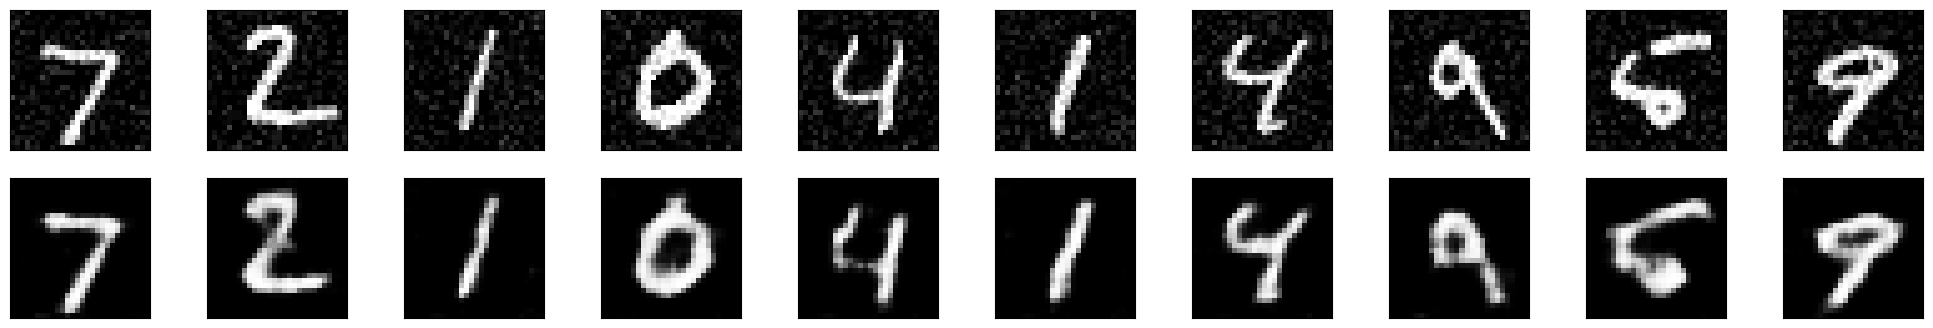

In [7]:
img, label = next(iter(test_loader))

#noise:
mean = 0
std = 0.1
noisy = img + torch.randn(img.size()) * std + mean
noisy = np.clip(noisy, 0., 1.)

# denoising:
denoise = model(noisy)


#plotting:
noisy = noisy.numpy()
denoise = denoise.view(20, 1, 28, 28)
denoise = denoise.detach().numpy()

fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(25,4))
for noisy_imgs, row in zip([noisy, denoise], axes):
    for img, ax in zip(noisy_imgs, row):
        ax.imshow(np.squeeze(img), cmap='gray')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

# PCA

In [13]:
from keras.datasets import mnist
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
x_train = np.reshape(X_train, (len(X_train), 784))
x_test = np.reshape(X_test, (len(X_test), 784))

#as before we add a gaussian noise with mean = 0, and variance = 0.1
mean = 0
std = 0.1
n, f = x_train.shape
n_t, f_t = x_test.shape
x_train_noisy = x_train + np.random.randn(n, f) * std + mean
x_test_noisy  = x_test + np.random.randn(n_t, f_t) * std + mean

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [14]:
#fitting PCA:
#we examined different number of components for building the PCA, Here we use one with the reasonable result:
n_component = 128
pca = PCA(n_component)
pca.fit(x_train_noisy)
train = pca.transform(x_train_noisy)
test  = pca.transform(x_test_noisy)
proj  = pca.inverse_transform(test)

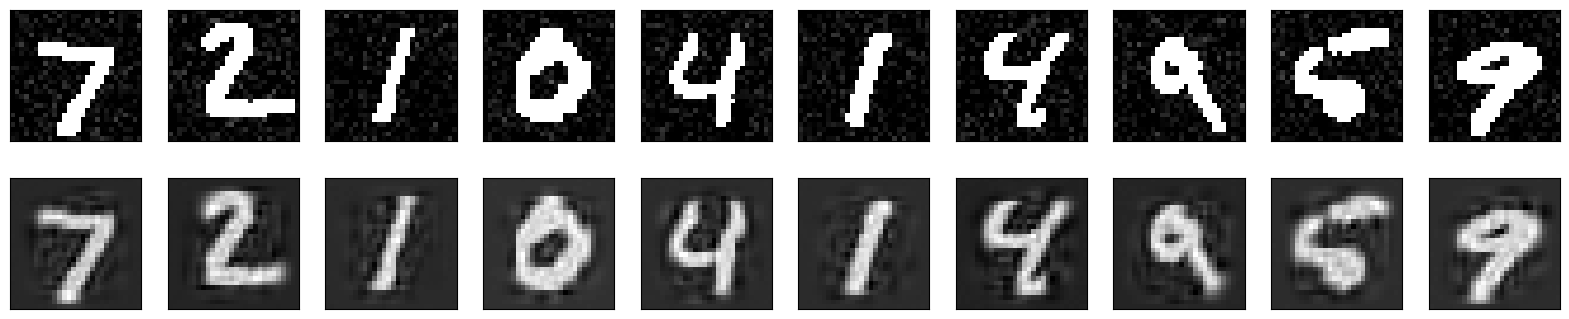

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    #original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #denoised image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(proj[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()